In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df=pd.read_csv('cleaned.csv')

In [63]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [64]:
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,functional,functional needs repair,non functional
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,1,0,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1,0,0
2,34310,functional,25.0,2013-02-25,Lottery Club,686,world vision,37.460664,-3.821329,Kwa Mahundi,...,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,1,0,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,0,0,1
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,1,0,0
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,gravity,vwc,pay annually,soft,enough,river,communal standpipe,1,0,0
59397,37057,functional,0.0,2011-04-11,Unknown,0,Unknown,34.017087,-8.750434,Mashine,...,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,1,0,0
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,1,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 32 columns):
id                         59400 non-null int64
status_group               59400 non-null object
amount_tsh                 59400 non-null float64
date_recorded              59400 non-null object
funder                     59400 non-null object
gps_height                 59400 non-null int64
installer                  59400 non-null object
longitude                  59400 non-null float64
latitude                   59400 non-null float64
wpt_name                   59400 non-null object
basin                      59400 non-null object
subvillage                 59029 non-null object
region                     59400 non-null object
region_code                59400 non-null int64
district_code              59400 non-null int64
lga                        59400 non-null object
ward                       59400 non-null object
population                 59400 non-null int64
public_meet

In [66]:
df_cat=df.drop(columns=['amount_tsh','date_recorded','gps_height','longitude','latitude','region_code','district_code',
                       'population','construction_year'])

In [67]:
df_cat

,id,status_group,funder,installer,wpt_name,basin,subvillage,region,lga,ward,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,functional,functional needs repair,non functional
0,69572,functional,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,...,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,1,0,0
1,8776,functional,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,...,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1,0,0
2,34310,functional,Lottery Club,world vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,...,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,1,0,0
3,67743,non functional,Unicef,Unicef,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,...,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,0,0,1
4,19728,functional,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,...,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,1,0,0
59396,27263,functional,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,...,gravity,vwc,pay annually,soft,enough,river,communal standpipe,1,0,0
59397,37057,functional,Unknown,Unknown,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,...,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,1,0,0
59398,31282,functional,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,...,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,1,0,0


In [68]:
df_cat.nunique()

id                         59400
status_group                   3
funder                      1896
installer                   2054
wpt_name                   37400
basin                          9
subvillage                 19287
region                        21
lga                          125
ward                        2092
public_meeting                 2
scheme_name                 2696
permit                         2
extraction_type_group         13
management                    12
payment                        7
water_quality                  8
quantity                       5
source                        10
waterpoint_type                7
functional                     2
functional needs repair        2
non functional                 2
dtype: int64

In [69]:
basin=pd.get_dummies(df_cat.basin)
basin

,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
59395,0,0,0,0,0,1,0,0,0
59396,0,0,0,0,0,0,1,0,0
59397,0,0,0,0,0,0,1,0,0
59398,0,0,0,0,0,0,1,0,0


In [70]:
region=pd.get_dummies(df_cat.region)
region

,Arusha,Dar es Salaam,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,...,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tabora,Tanga
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59396,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59398,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
extraction_type_group=pd.get_dummies(df_cat.extraction_type_group)
extraction_type_group

,afridev,gravity,india mark ii,india mark iii,mono,nira/tanira,other,other handpump,other motorpump,rope pump,submersible,swn 80,wind-powered
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,1,0,0,0,0,0,0,0,0,0,0,0
59396,0,1,0,0,0,0,0,0,0,0,0,0,0
59397,0,0,0,0,0,0,0,0,0,0,0,1,0
59398,0,0,0,0,0,1,0,0,0,0,0,0,0


In [72]:
management=pd.get_dummies(df_cat.management)
management

,company,other,other - school,parastatal,private operator,trust,unknown,vwc,water authority,water board,wua,wug
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,0,0,0,0,0,0,0,0,1,0,0
59396,0,0,0,0,0,0,0,1,0,0,0,0
59397,0,0,0,0,0,0,0,1,0,0,0,0
59398,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
df_cat.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

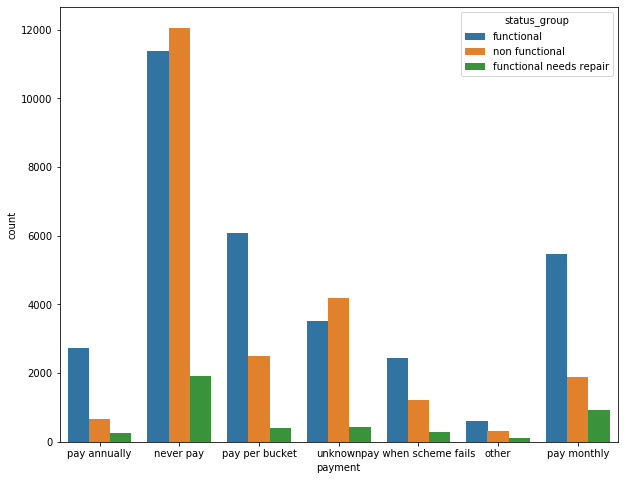

In [75]:
plt.figure(figsize=(10,8))
sns.countplot(x='payment',hue='status_group',data=df_cat)

In [92]:
payment=df_cat.payment
payment

0                 pay annually
1                    never pay
2               pay per bucket
3                    never pay
4                    never pay
                 ...          
59395           pay per bucket
59396             pay annually
59397              pay monthly
59398                never pay
59399    pay when scheme fails
Name: payment, Length: 59400, dtype: object

In [94]:
def value_to_binary(df, column, zero_val):
    for cell in column:
        if df[column][cell] == zero_val:
            df[column][cell] = 0
        else:
            df[column][cell] = 1
    return df

In [107]:
df_cat["payment_value"] = np.where(df_cat["payment"]=="never pay", 0, 1)
df_cat

,id,status_group,funder,installer,wpt_name,basin,subvillage,region,lga,ward,...,management,payment,water_quality,quantity,source,waterpoint_type,functional,functional needs repair,non functional,payment_value
0,69572,functional,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,...,vwc,pay annually,soft,enough,spring,communal standpipe,1,0,0,1
1,8776,functional,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,...,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,1,0,0,0
2,34310,functional,Lottery Club,world vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,...,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,1,0,0,1
3,67743,non functional,Unicef,Unicef,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,...,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,0,0,1,0
4,19728,functional,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,...,water board,pay per bucket,soft,enough,spring,communal standpipe,1,0,0,1
59396,27263,functional,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,...,vwc,pay annually,soft,enough,river,communal standpipe,1,0,0,1
59397,37057,functional,Unknown,Unknown,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,...,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,1,0,0,1
59398,31282,functional,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,...,vwc,never pay,soft,insufficient,shallow well,hand pump,1,0,0,0


In [110]:
df_cat.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [113]:
df_cat.groupby(['status_group','water_quality']).count()

id  funder  installer  \
status_group            water_quality                                  
functional              coloured              246     246        246   
                        fluoride              151     151        151   
                        fluoride abandoned      6       6          6   
                        milky                 438     438        438   
                        salty                2220    2220       2220   
                        salty abandoned       174     174        174   
                        soft                28760   28760      28760   
                        unknown               264     264        264   
functional needs repair coloured               54      54         54   
                        fluoride               13      13         13   
                        milky                  14      14         14   
                        salty                 225     225        225   
                        salty abandoned        72      72         72   
                        soft                 3904    3904       3904   
                        unknown                35      35         35   
non functional          coloured              190     190        190   
                        fluoride               36      36         36   
                        fluoride abandoned     11      11         11   
                        milky                 352     352        352   
                        salty                2411    2411       2411   
                        salty abandoned        93      93         93   
                        soft                18154   18154      18154   
                        unknown              1577    1577       1577   

                                            wpt_name  basin  subvillage  \
status_group            water_quality                                     
functional              coloured                 246    246         246   
                        fluoride                 151    151         151   
                        fluoride abandoned         6      6           6   
                        milky                    438    438         438   
                        salty                   2220   2220        2111   
                        salty abandoned          174    174         173   
                        soft                   28760  28760       28665   
                        unknown                  264    264         264   
functional needs repair coloured                  54     54          54   
                        fluoride                  13     13          13   
                        milky                     14     14          14   
                        salty                    225    225         225   
                        salty abandoned           72     72          72   
                        soft                    3904   3904        3903   
                        unknown                   35     35          35   
non functional          coloured                 190    190         190   
                        fluoride                  36     36          36   
                        fluoride abandoned        11     11          11   
                        milky                    352    352         352   
                        salty                   2411   2411        2302   
                        salty abandoned           93     93          93   
                        soft                   18154  18154       18098   
                        unknown                 1577   1577        1577   

                                            region    lga   ward  \
status_group            water_quality                              
functional              coloured               246    246    246   
                        fluoride               151    151    151   
                        fluoride abandoned       6      6      6   
                        milky 